# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[37 -1  6]
 [-1 14  2]
 [20 13  1]
 [-1  9  7]
 [ 8 27 16]]
Simplices
 [[15 21 10]
 [28 25 13]
 [25 28 23]
 [22  8 10]
 [20  3 24]]
Points
 [[[0.04359314 0.22857866]
  [0.09216698 0.31784264]
  [0.00422856 0.80608356]]

 [[0.83269058 0.24603976]
  [0.56493466 0.01821988]
  [0.95371044 0.01112668]]

 [[0.56493466 0.01821988]
  [0.83269058 0.24603976]
  [0.52998449 0.05521597]]

 [[0.18731101 0.92993882]
  [0.19789544 0.99173754]
  [0.00422856 0.80608356]]

 [[0.71220037 0.91209366]
  [0.51642393 0.78135602]
  [0.58024333 0.57726766]]]


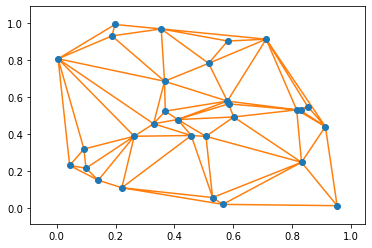

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

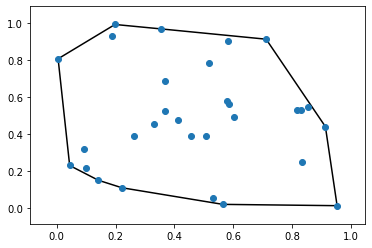

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

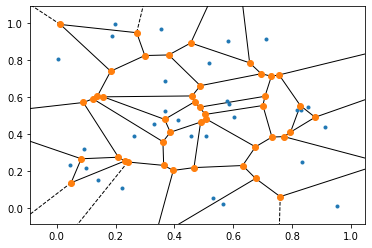

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.32908974 0.45443468]
 [0.26322509 0.38682523]
 [0.45735434 0.39083883]
 [0.51642393 0.78135602]
 [0.58128201 0.90214905]
 [0.36643619 0.68445921]
 [0.91384459 0.43903675]
 [0.09909437 0.21379719]
 [0.19789544 0.99173754]
 [0.60169458 0.49106736]
 [0.00422856 0.80608356]
 [0.50744345 0.38622544]
 [0.35518631 0.96767365]
 [0.95371044 0.01112668]
 [0.41107653 0.47736191]
 [0.04359314 0.22857866]
 [0.8540431  0.54618313]
 [0.5842537  0.56216249]
 [0.81614075 0.52970283]
 [0.82935517 0.52663676]
 [0.71220037 0.91209366]
 [0.09216698 0.31784264]
 [0.18731101 0.92993882]
 [0.52998449 0.05521597]
 [0.58024333 0.57726766]
 [0.56493466 0.01821988]
 [0.22119647 0.10819418]
 [0.36897406 0.52265711]
 [0.83269058 0.24603976]
 [0.14095229 0.14885545]]


In [8]:
%%timeit

tree.query((0.5,0.5))

28.6 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

551 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

4.2 ms ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

916 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.007351328787200365, 8026)
(0.007351328787200365, 8026)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

39.7 µs ± 53.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

32.3 µs ± 98.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

962 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

36.1 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
